<a href="https://colab.research.google.com/github/srishticodes/Dataanalysis/blob/main/Waterpotability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


acess the safe drinking water dataset and determine whether the particular water sample consisiting of  is potable or no


ph                     7.080795
Hardness             196.369496
Solids             22014.092526
Chloramines            7.122277
Sulfate              333.775777
Conductivity         426.205111
Organic_carbon        14.284970
Trihalomethanes       66.396293
Turbidity              3.966786
Potability             0.390110
dtype: float64
2306.9684139939827
Features             ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  

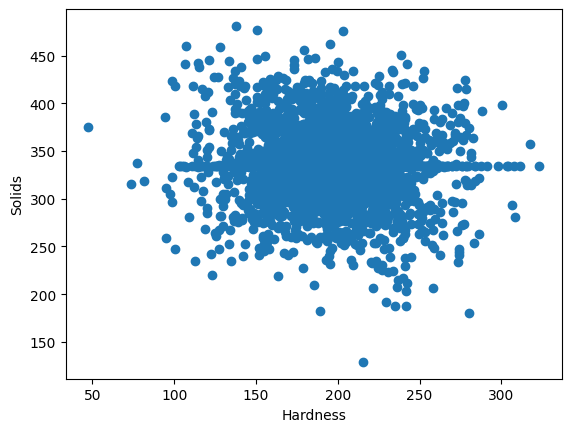

333.7757766108134
7.080794504276836
Empty DataFrame
Columns: [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []
Target      Potability
0             0
1             0
2             0
3             0
4             0
...         ...
3271          1
3272          1
3273          1
3274          1
3275          1

[3276 rows x 1 columns]


<ipython-input-7-d6e607948da0>:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Non drinkable' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[mask1,'Potability']="Non drinkable"


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics  import confusion_matrix
from sklearn.metrics import classification_report

df = pd.read_csv('/content/water_potability.csv')
print(df.mean())
print(df.mean().mean())
df.fillna(df.mean(),inplace=True)
print("Features",df.iloc[ :,0:9])
print("Target:\n", df.iloc[ 0: ,9:], df.shape[1], df.shape[0])

print("Count", df.shape[0])
print("Count",df.shape[1])
print("Count",df.dtypes)

#plot hardness and sulphate
plt.scatter(df['Hardness'],df['Sulfate'])
plt.xlabel('Hardness')
plt.ylabel('Solids')
plt.show()

#mean of sulphate
print(df['Sulfate'].mean())
#mean of pH
print(df['ph'].mean())

#fill features with null with mean
#display samples ph<4 & chrolam>93
print(df.loc[(df['ph']<4) & df ['Chloramines']>9.3])

#convert target column value for 0-non drinkable 1-drinkable
mask1= df['Potability']<0
mask2= df['Potability']>1
df.loc[mask1,'Potability']="Non drinkable"
df.loc[mask2,'Potability']="Drinkable"
print('Target', df.iloc[ 0: ,9:])


Prepare the training dataset (Hold on cross validation method)

ph                     7.080795
Hardness             196.369496
Solids             22014.092526
Chloramines            7.122277
Sulfate              333.775777
Conductivity         426.205111
Organic_carbon        14.284970
Trihalomethanes       66.396293
Turbidity              3.966786
Potability             0.390110
dtype: float64
2306.9684139939827
Features             ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  

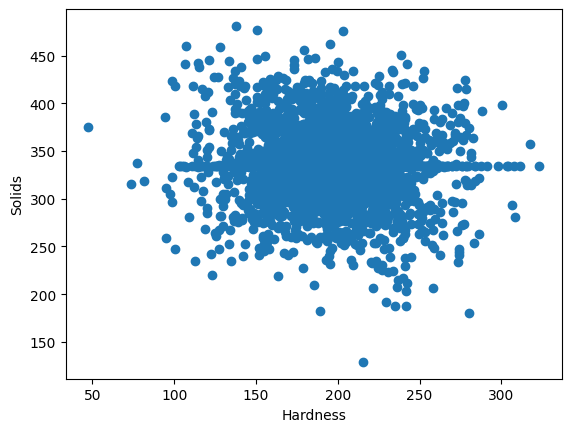

333.7757766108134
7.080794504276836
Empty DataFrame
Columns: [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []
Target       Potability
0              0
1              0
2              0
3              0
4              0
...          ...
3271           1
3272           1
3273           1
3274           1
3275           1

[3276 rows x 1 columns]
2784
492
2784
492
KNN Accuracy 0.5447154471544715
[[219  87]
 [137  49]]


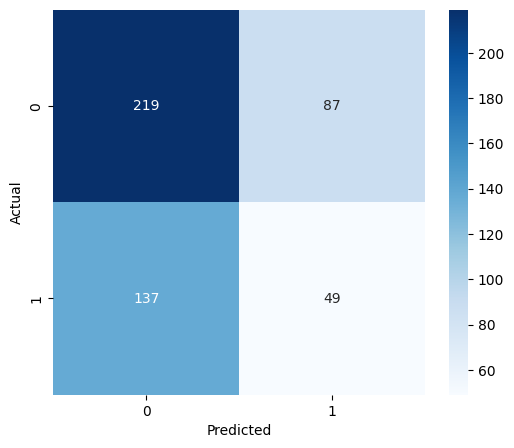

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics  import confusion_matrix
from sklearn.metrics import classification_report

df = pd.read_csv('/content/water_potability.csv')
print(df.mean())
print(df.mean().mean())
df.fillna(df.mean(),inplace=True)
print("Features",df.iloc[ :,0:9])
print("Target:\n", df.iloc[ 0: ,9:], df.shape[1], df.shape[0])

print("Count", df.shape[0])
print("Count",df.shape[1])
print("Count",df.dtypes)

#plot hardness and sulphate
plt.scatter(df['Hardness'],df['Sulfate'])
plt.xlabel('Hardness')
plt.ylabel('Solids')
plt.show()

#mean of sulphate
print(df['Sulfate'].mean())
#mean of pH
print(df['ph'].mean())

#fill features with null with mean
#display samples ph<4 & chrolam>93
print(df.loc[(df['ph']<4) & df ['Chloramines']>9.3])

#convert target column value for 0-non drinkable 1-drinkable
# Instead of using strings, use 0 and 1 for Potability
df['Potability'] = df['Potability'].replace({0: 0, 1: 1}) # Assuming 0 and 1 were the original values

print('Target', df.iloc[ 0: ,9:])

X = df.iloc[ :, :-1]
y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)
KNN_pred=KNN.predict(X_test)
print("KNN Accuracy",accuracy_score(y_test,KNN_pred))
print(confusion_matrix(y_test,KNN_pred))


# In the heatmap, you should also use numerical labels
import seaborn as sns
cm = confusion_matrix(y_test,KNN_pred)
plt.figure(figsize=(6,5)) # Fixed the plt,figure to plt.figure
sns.heatmap(confusion_matrix(y_test,KNN_pred),annot=True, fmt='d', cmap='Blues')
class_labels=[0, 1]  # Changed to numerical labels
x_ticklabels=class_labels
y_ticklabels=class_labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

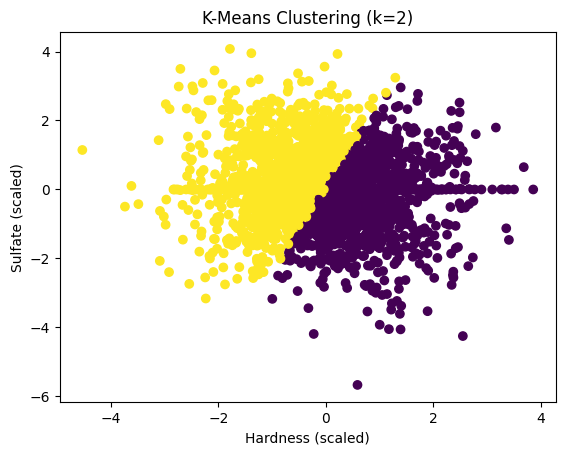

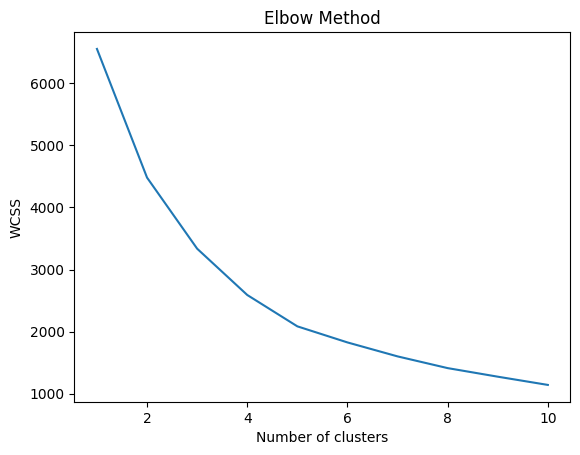

In [ ]:
# prompt: Apply kmeans clustering with k =2 to cluster the water samples
# considering any two features from the water sample data set. Plot the
# clusters. Find out the optimum value of k with the help of elbow
# method.
# Hints: inertia_ calculates the sum squared error to check how good
# the clustering is done. For each k it calculates

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame (from the previous code)

# Select two features for clustering (e.g., 'Hardness' and 'Sulfate')
X = df[['Hardness', 'Sulfate']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Hardness (scaled)')
plt.ylabel('Sulfate (scaled)')
plt.title('K-Means Clustering (k=2)')
plt.show()

# Elbow method to find the optimal k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Write a python code to read a data sample (csv file). Next initialize a
membership matrix, and cluster the data samples using soft clustering
technique having level of fuzziness as 1.26 and c=2 (without using inbuilt
methods)

In [ ]:
# prompt: Write a python code to read a data sample (csv file). Next initialize a
# membership matrix, and cluster the data samples using soft clustering
# technique having level of fuzziness as 1.26 and c=2 (without using inbuilt
# methods)

import numpy as np

def fuzzy_c_means(data, c, fuzzifier, max_iter=100, tolerance=1e-4):
    """
    Performs fuzzy c-means clustering.

    Args:
        data: A NumPy array of shape (n_samples, n_features).
        c: The number of clusters.
        fuzzifier: The fuzziness parameter (m).
        max_iter: The maximum number of iterations.
        tolerance: The convergence tolerance.

    Returns:
        A tuple containing:
            - membership_matrix: A NumPy array of shape (n_samples, c) representing the membership degrees.
            - centroids: A NumPy array of shape (c, n_features) representing the cluster centroids.
    """
    n_samples, n_features = data.shape

    # Initialize membership matrix randomly
    membership_matrix = np.random.rand(n_samples, c)
    membership_matrix = membership_matrix / np.sum(membership_matrix, axis=1, keepdims=True)

    # Iterate until convergence or maximum iterations
    for _ in range(max_iter):
        old_membership_matrix = membership_matrix.copy()

        # Calculate cluster centroids
        centroids = np.zeros((c, n_features))
        for i in range(c):
            numerator = np.sum(data * (membership_matrix[:, i] ** fuzzifier)[:, np.newaxis], axis=0)
            denominator = np.sum(membership_matrix[:, i] ** fuzzifier)
            centroids[i] = numerator / denominator

        # Update membership matrix
        distances = np.linalg.norm(data[:, np.newaxis, :] - centroids, axis=2)
        for i in range(n_samples):
            for j in range(c):
                membership_matrix[i, j] = 1 / np.sum((distances[i, j] / distances[i, :]) ** (2 / (fuzzifier - 1)))

        # Check for convergence
        if np.linalg.norm(membership_matrix - old_membership_matrix) < tolerance:
            break

    return membership_matrix, centroids

# Example usage (replace with your data and parameters)

# Assuming 'X' is your data from the DataFrame, e.g., X = df[['Hardness', 'Sulfate']].values
# Select the features you want to cluster on
X = df[['Hardness', 'Sulfate']].values

# Scale your data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Parameters
c = 2  # Number of clusters
fuzzifier = 1.26

# Perform fuzzy c-means clustering
membership_matrix, centroids = fuzzy_c_means(X_scaled, c, fuzzifier)


print("Membership Matrix:\n", membership_matrix)
print("\nCentroids:\n", centroids)


Membership Matrix:
 [[2.50323959e-01 7.49676041e-01]
 [4.18014795e-03 9.95819852e-01]
 [9.99990968e-01 9.03188139e-06]
 ...
 [3.93484733e-05 9.99960652e-01]
 [9.99964481e-01 3.55185331e-05]
 [4.65622281e-01 5.34377719e-01]]

Centroids:
 [[ 0.68593623 -0.31939502]
 [-0.73573262  0.34462717]]


Write a python code to read a data sample (csv file) and cluster it using
kmeans clustering algorithm. Build your own functions for distance
calculation and centroid calculation. Convergence criteria can be set to
either (iteration (change of centroid) till 40 times) or (difference between
old mean and new mean < threshold). Write a function to print the sum
squared error value for a particular
k. k is initially taken from user. Execute it for k=2 and k=3 . Initial
centroids are randomly chosen.

In [ ]:
# prompt: Write a python code to read a data sample (csv file) and cluster it using
# kmeans clustering algorithm. Build your own functions for distance
# calculation and centroid calculation. Convergence criteria can be set to
# either (iteration (change of centroid) till 40 times) or (difference between
# old mean and new mean < threshold). Write a function to print the sum
# squared error value for a particular
# k. k is initially taken from user. Execute it for k=2 and k=3 . Initial
# centroids are randomly chosen.

import pandas as pd
import numpy as np
import random

def euclidean_distance(point1, point2):
  return np.sqrt(np.sum((point1 - point2)**2))

def calculate_centroid(cluster_points):
  return np.mean(cluster_points, axis=0)

def calculate_sse(data, labels, centroids):
    sse = 0
    for i, point in enumerate(data):
        sse += euclidean_distance(point, centroids[labels[i]])**2
    return sse

def kmeans_clustering(data, k, max_iterations=40):
    # Initialize centroids randomly
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iterations):
        # Assign data points to nearest centroids
        labels = np.argmin(np.linalg.norm(data[:, np.newaxis, :] - centroids, axis=2), axis=1)

        # Calculate new centroids
        new_centroids = np.array([calculate_centroid(data[labels == i]) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    sse = calculate_sse(data, labels, centroids)
    return labels, centroids, sse

# Load the data
df = pd.read_csv('/content/water_potability.csv')
df.fillna(df.mean(), inplace=True)  # Handle missing values

# Select features for clustering (example: 'Hardness' and 'Sulfate')
X = df[['Hardness', 'Sulfate']].values

# Scale the features (important for k-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# K-means clustering for k=2 and k=3
for k in [2, 3]:
    labels, centroids, sse = kmeans_clustering(X_scaled, k)
    print(f"K-means clustering with k={k}")
    print("Labels:", labels)
    print("Centroids:\n", centroids)
    print(f"Sum of Squared Errors (SSE): {sse}\n")


K-means clustering with k=2
Labels: [1 1 0 ... 1 0 1]
Centroids:
 [[ 0.70541746 -0.32010584]
 [-0.74345251  0.33736547]]
Sum of Squared Errors (SSE): 4480.136271612847

K-means clustering with k=3
Labels: [0 1 0 ... 1 0 0]
Centroids:
 [[ 0.78437553  0.19485237]
 [-0.80265087  0.52775719]
 [-0.04047409 -1.2764726 ]]
Sum of Squared Errors (SSE): 3375.8196991852938

